In [1]:
import numpy as np
import cv2
import pandas as pd
import matplotlib.pyplot as plt
import PIL.Image as Image
import tensorflow as tf
import os
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
from tensorflow.keras.utils import to_categorical
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
import cv2

dataset_path = '/content/drive/MyDrive/Dataset'
sub_folders = os.listdir(dataset_path)
IMAGE_SHAPE = (224, 224)
i = 0
images = []
labels = []
path_lists = []
temp = sub_folders

for sub_folder in sub_folders:
    sub_folder_index = temp.index(sub_folder)
    label = sub_folder_index

    # Skipping folder with label 2 and adjusting label 3 to 2
    if label == 2:
        continue
    if label == 3:
        label = 2

    path = dataset_path + '/' + sub_folder
    sub_folder_images = os.listdir(path)

    # Reading images from the subfolder one at a time
    for image in sub_folder_images:
        image_path = path + '/' + image
        image = cv2.imread(image_path)

        # Check if the image was successfully loaded
        if image is None:
            print(f"Warning: Could not read image {image_path}. Skipping this file.")
            continue

        resized_image = cv2.resize(image, IMAGE_SHAPE)
        path_lists.append(image_path)
        images.append(resized_image)
        labels.append(label)
        i += 1


In [4]:
images = np.array(images)
labels = np.array(labels)
defect_classes = ['Holes','Horizontal','Vertical']
num_of_classes = 3
classes_encoded = to_categorical(labels,num_classes = num_of_classes)

In [5]:
images = images/255.0

In [6]:
X_train,X_test,y_train,y_test = train_test_split(images,classes_encoded,test_size=0.2,random_state=10)

In [7]:
X_train.shape

(48, 224, 224, 3)

### CNN Model 1

In [8]:
defect_classifier1 = Sequential()

#Adding the CNN layers
defect_classifier1.add(Conv2D(16,(3,3),1,activation='relu',input_shape=(224,224,3)))
defect_classifier1.add(MaxPooling2D(2,2))
defect_classifier1.add(Conv2D(32,(3,3),1,activation='relu'))
defect_classifier1.add(MaxPooling2D(2,2))
defect_classifier1.add(Conv2D(64,(3,3),1,activation='relu'))
defect_classifier1.add(MaxPooling2D(2,2))
defect_classifier1.add(Conv2D(32,(3,3),1,activation='relu'))
defect_classifier1.add(MaxPooling2D())
defect_classifier1.add(Conv2D(16,(3,3),1,activation='relu'))
defect_classifier1.add(MaxPooling2D())

#Flattening the output of Conv
defect_classifier1.add(Flatten())

#Adding Hidden layers along with Dropout
defect_classifier1.add(Dense(128,activation='relu'))
defect_classifier1.add(Dropout(0.25))
defect_classifier1.add(Dense(64,activation='relu'))
defect_classifier1.add(Dropout(0.2))

#Output layer
defect_classifier1.add(Dense(3,activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
defect_classifier1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 24, 24, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 12, 12, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 10, 10, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 5, 5, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 400)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          51,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 106,451 (415.82 KB)

 Trainable params: 106,451 (415.82 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
defect_classifier1.compile(optimizer='adam',loss=tf.keras.losses.CategoricalCrossentropy(),metrics=['accuracy'])
filepath = '/content/model1.keras'
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath = filepath,monitor='val_loss',verbose=1,save_best_only=True,mode='min')
callbacks = [checkpoint]

In [14]:
history1 = defect_classifier1.fit(X_train,y_train,epochs=30,batch_size=32,validation_split=0.2,callbacks=[callbacks])

Epoch 1/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.4712 - loss: 1.0762
Epoch 1: val_loss improved from inf to 1.00365, saving model to /content/model1.keras
2/2 ━━━━━━━━━━━━━━━━━━━━ 14s 5s/step - accuracy: 0.4720 - loss: 1.0745 - val_accuracy: 0.6000 - val_loss: 1.0037
Epoch 2/30
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.6250 - loss: 0.9290
Epoch 2: val_loss did not improve from 1.00365
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.6294 - loss: 0.9213 - val_accuracy: 0.6000 - val_loss: 1.2084
Epoch 3/30
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.5938 - loss: 0.8991
Epoch 3: val_loss did not improve from 1.00365
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.6190 - loss: 0.8989 - val_accuracy: 0.6000 - val_loss: 1.1580
Epoch 4/30
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - accuracy: 0.6875 - loss: 0.6454
Epoch 4: val_loss improved from 1.00365 to 0.92859, saving model to /content/model1.keras
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - accuracy: 0.6502 - 

### CNN Model 2

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

# Define the model
defect_classifier2 = Sequential()

# Adding the CNN layers
defect_classifier2.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
defect_classifier2.add(BatchNormalization())
defect_classifier2.add(MaxPooling2D(2, 2))

defect_classifier2.add(Conv2D(64, (3, 3), activation='relu'))
defect_classifier2.add(BatchNormalization())
defect_classifier2.add(MaxPooling2D(2, 2))

defect_classifier2.add(Conv2D(128, (3, 3), activation='relu'))
defect_classifier2.add(BatchNormalization())
defect_classifier2.add(MaxPooling2D(2, 2))

defect_classifier2.add(Conv2D(64, (3, 3), activation='relu'))
defect_classifier2.add(BatchNormalization())
defect_classifier2.add(MaxPooling2D(2, 2))

# Flatten the output
defect_classifier2.add(Flatten())

# Adding Dense layers with Dropout and Batch Normalization
defect_classifier2.add(Dense(256, activation='relu'))
defect_classifier2.add(BatchNormalization())
defect_classifier2.add(Dropout(0.4))

defect_classifier2.add(Dense(128, activation='relu'))
defect_classifier2.add(BatchNormalization())
defect_classifier2.add(Dropout(0.3))

# Output layer
defect_classifier2.add(Dense(3, activation='softmax'))

# Compile the model with a lower learning rate
optimizer = Adam(learning_rate=0.0001)
defect_classifier2.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Model checkpoint
filepath = '/content/model2.keras'
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath=filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
callbacks = [checkpoint]

# Train the model
history2 = defect_classifier2.fit(X_train, y_train, epochs=50, batch_size=64, validation_split=0.2, callbacks=callbacks)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12s/step - accuracy: 0.3158 - loss: 2.0157
Epoch 1: val_loss improved from inf to 1.08570, saving model to /content/model2.keras
1/1 ━━━━━━━━━━━━━━━━━━━━ 14s 14s/step - accuracy: 0.3158 - loss: 2.0157 - val_accuracy: 0.4000 - val_loss: 1.0857
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10s/step - accuracy: 0.5000 - loss: 1.3428
Epoch 2: val_loss did not improve from 1.08570
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step - accuracy: 0.5000 - loss: 1.3428 - val_accuracy: 0.3000 - val_loss: 1.0864
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step - accuracy: 0.6842 - loss: 0.8011
Epoch 3: val_loss did not improve from 1.08570
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step - accuracy: 0.6842 - loss: 0.8011 - val_accuracy: 0.3000 - val_loss: 1.0886
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step - accuracy: 0.6316 - loss: 0.8678
Epoch 4: val_loss did not improve from 1.08570
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step - accuracy: 0.6316 - loss: 0.8678 - val_accuracy: 0.5000 - 

In [16]:
defect_classifier2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)                    │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 222, 222, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 109, 109, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 52, 52, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 24, 24, 64)          │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 24, 24, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 9216)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 256)                 │       2,359,552 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 7,685,003 (29.32 MB)

 Trainable params: 2,561,219 (9.77 MB)

 Non-trainable params: 1,344 (5.25 KB)

 Optimizer params: 5,122,440 (19.54 MB)

### CNN Model 3

In [17]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, LeakyReLU
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Define an alternative CNN architecture
defect_classifier3 = Sequential()

# Adding the CNN layers with LeakyReLU activation and Batch Normalization
defect_classifier3.add(Conv2D(32, (3, 3), padding='same', input_shape=(224, 224, 3)))
defect_classifier3.add(BatchNormalization())
defect_classifier3.add(LeakyReLU(alpha=0.1))
defect_classifier3.add(MaxPooling2D(2, 2))

defect_classifier3.add(Conv2D(64, (3, 3), padding='same'))
defect_classifier3.add(BatchNormalization())
defect_classifier3.add(LeakyReLU(alpha=0.1))
defect_classifier3.add(MaxPooling2D(2, 2))

defect_classifier3.add(Conv2D(128, (3, 3), padding='same'))
defect_classifier3.add(BatchNormalization())
defect_classifier3.add(LeakyReLU(alpha=0.1))
defect_classifier3.add(MaxPooling2D(2, 2))

defect_classifier3.add(Conv2D(256, (3, 3), padding='same'))
defect_classifier3.add(BatchNormalization())
defect_classifier3.add(LeakyReLU(alpha=0.1))
defect_classifier3.add(MaxPooling2D(2, 2))

# Flattening the output of Conv layers
defect_classifier3.add(Flatten())

# Adding Dense layers with Dropout and a higher number of neurons
defect_classifier3.add(Dense(512))
defect_classifier3.add(BatchNormalization())
defect_classifier3.add(LeakyReLU(alpha=0.1))
defect_classifier3.add(Dropout(0.5))

defect_classifier3.add(Dense(256))
defect_classifier3.add(BatchNormalization())
defect_classifier3.add(LeakyReLU(alpha=0.1))
defect_classifier3.add(Dropout(0.4))

# Output layer
defect_classifier3.add(Dense(3, activation='softmax'))

# Compile the model with the RMSprop optimizer and a different learning rate
learning_rate = 0.00005
defect_classifier3.compile(optimizer=RMSprop(learning_rate=learning_rate),
                           loss=tf.keras.losses.CategoricalCrossentropy(),
                           metrics=['accuracy'])



/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [18]:
defect_classifier3.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)                    │ (None, 224, 224, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 224, 224, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu (LeakyReLU)              │ (None, 224, 224, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 112, 112, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 112, 112, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_1 (LeakyReLU)            │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 56, 56, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 56, 56, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_2 (LeakyReLU)            │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 28, 28, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 28, 28, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_3 (LeakyReLU)            │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 14, 14, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 50176)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 512)                 │      25,690,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │              

 Total params: 26,216,131 (100.01 MB)

 Trainable params: 26,213,635 (100.00 MB)

 Non-trainable params: 2,496 (9.75 KB)

In [20]:
# Set up callbacks: ModelCheckpoint and EarlyStopping
filepath = '/content/model3.keras'
checkpoint = ModelCheckpoint(filepath=filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
early_stop = EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True)
callbacks = [checkpoint, early_stop]

# Train the model with an adjusted number of epochs
history3 = defect_classifier3.fit(X_train, y_train, epochs=40, batch_size=32, validation_split=0.2, callbacks=callbacks)


Epoch 1/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - accuracy: 0.2697 - loss: 1.4522  
Epoch 1: val_loss improved from inf to 1.05299, saving model to /content/model3.keras
2/2 ━━━━━━━━━━━━━━━━━━━━ 23s 13s/step - accuracy: 0.2763 - loss: 1.4393 - val_accuracy: 0.8000 - val_loss: 1.0530
Epoch 2/40
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step - accuracy: 0.6875 - loss: 0.8251
Epoch 2: val_loss improved from 1.05299 to 1.04878, saving model to /content/model3.keras
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.6678 - loss: 0.8394 - val_accuracy: 0.7000 - val_loss: 1.0488
Epoch 3/40
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step - accuracy: 0.9375 - loss: 0.4506
Epoch 3: val_loss improved from 1.04878 to 1.04701, saving model to /content/model3.keras
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.9090 - loss: 0.4811 - val_accuracy: 0.4000 - val_loss: 1.0470
Epoch 4/40
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step - accuracy: 0.7500 - loss: 0.5457
Epoch 4: val_loss improved from 1.04701 to 1.04193, saving mo

### Evaluating the different Models

In [21]:
defect_classifier1.evaluate(X_test,y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.7500 - loss: 0.2390


[0.23895245790481567, 0.75]

In [22]:
defect_classifier2.evaluate(X_test,y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.8333 - loss: 0.8048


[0.8047957420349121, 0.8333333134651184]

In [23]:
defect_classifier3.evaluate(X_test,y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.8333 - loss: 0.9417


[0.9416699409484863, 0.8333333134651184]

In [25]:
y_predictions1 = defect_classifier1.predict(X_test)
y_predictions1 = [np.argmax(i) for i in y_predictions1]
y_actual1 = [np.argmax(i) for i in y_test]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 887ms/step


In [27]:
y_predictions2 = defect_classifier2.predict(X_test)
y_predictions2 = [np.argmax(i) for i in y_predictions2]
y_actual2 = [np.argmax(i) for i in y_test]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 476ms/step


In [28]:
y_predictions3 = defect_classifier3.predict(X_test)
y_predictions3 = [np.argmax(i) for i in y_predictions3]
y_actual3 = [np.argmax(i) for i in y_test]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 478ms/step


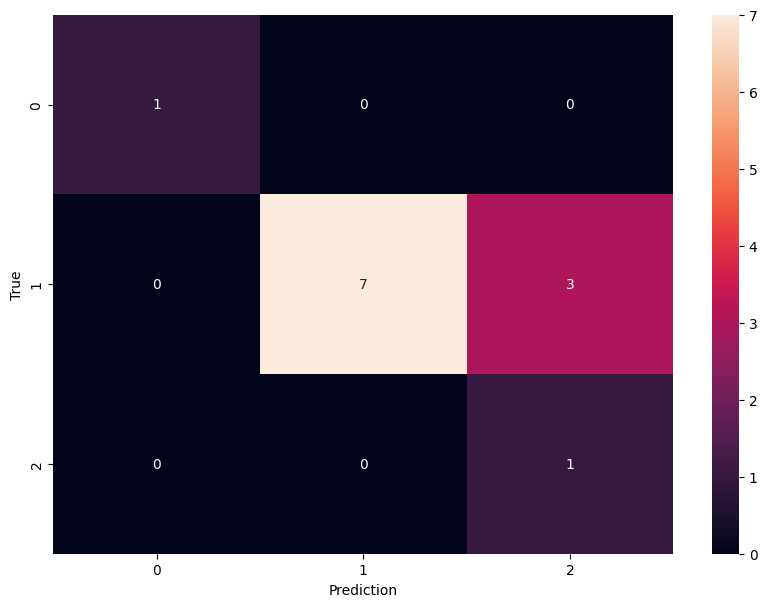

In [29]:
cm1 = confusion_matrix(y_actual1,y_predictions1)
plt.figure(figsize=(10,7))
sb.heatmap(cm1,annot=True,fmt='d')
plt.xlabel('Prediction')
plt.ylabel('True')
plt.show()

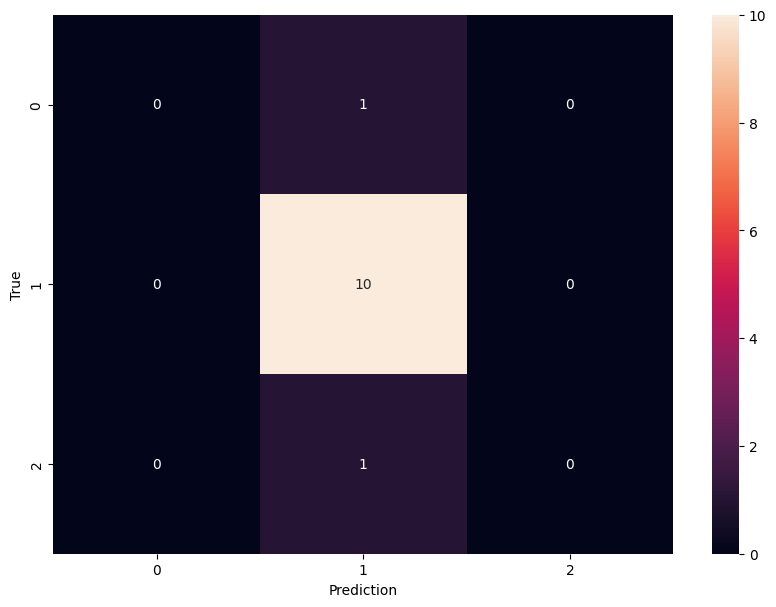

In [30]:
cm2 = confusion_matrix(y_actual2,y_predictions2)
plt.figure(figsize=(10,7))
sb.heatmap(cm2,annot=True,fmt='d')
plt.xlabel('Prediction')
plt.ylabel('True')
plt.show()

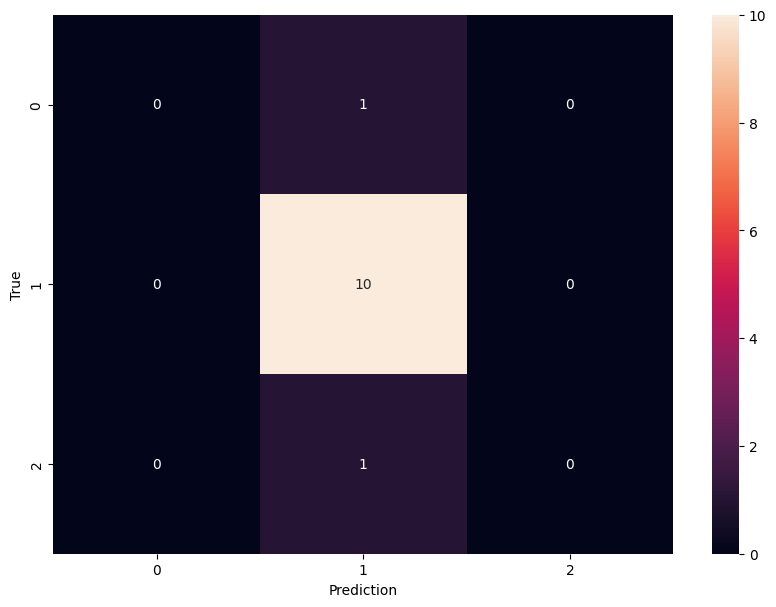

In [31]:
cm3 = confusion_matrix(y_actual3,y_predictions3)
plt.figure(figsize=(10,7))
sb.heatmap(cm3,annot=True,fmt='d')
plt.xlabel('Prediction')
plt.ylabel('True')
plt.show()

In [32]:
print(classification_report(y_actual1,y_predictions1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      0.70      0.82        10
           2       0.25      1.00      0.40         1

    accuracy                           0.75        12
   macro avg       0.75      0.90      0.74        12
weighted avg       0.94      0.75      0.80        12



In [33]:
print(classification_report(y_actual2,y_predictions2))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.83      1.00      0.91        10
           2       0.00      0.00      0.00         1

    accuracy                           0.83        12
   macro avg       0.28      0.33      0.30        12
weighted avg       0.69      0.83      0.76        12



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [35]:
print(classification_report(y_actual3,y_predictions3))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.83      1.00      0.91        10
           2       0.00      0.00      0.00         1

    accuracy                           0.83        12
   macro avg       0.28      0.33      0.30        12
weighted avg       0.69      0.83      0.76        12



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Performance plots

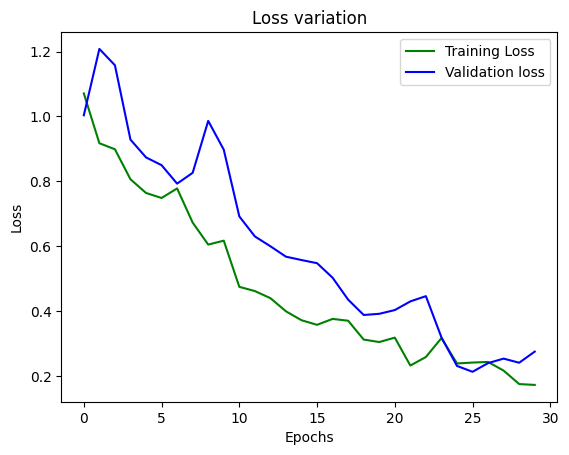

In [34]:
plt.plot(history1.history['loss'],color='green',label='Training Loss')
plt.plot(history1.history['val_loss'],color='blue',label='Validation loss')
plt.legend(loc='upper right')
plt.title('Loss variation')
plt.savefig('Model Training History')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

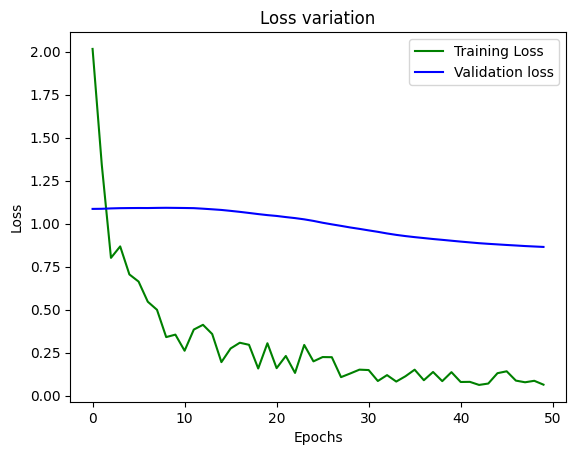

In [36]:
plt.plot(history2.history['loss'],color='green',label='Training Loss')
plt.plot(history2.history['val_loss'],color='blue',label='Validation loss')
plt.legend(loc='upper right')
plt.title('Loss variation')
plt.savefig('Model Training History')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

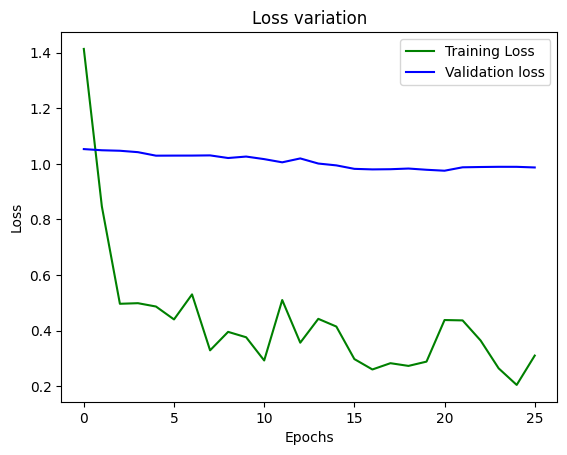

In [37]:
plt.plot(history3.history['loss'],color='green',label='Training Loss')
plt.plot(history3.history['val_loss'],color='blue',label='Validation loss')
plt.legend(loc='upper right')
plt.title('Loss variation')
plt.savefig('Model Training History')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()